<a href="https://colab.research.google.com/github/rlmtm/ML-Testing/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics
from google.colab import files
uploaded = files.upload()
#Read the data
df=pd.read_csv('news.csv')
#Get shape and head
df.shape
df.head()

Saving news.csv to news (3).csv


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [48]:
labels=df.label
labels.head()
del df["Unnamed: 0"]
del df["title"]
df.shape
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [49]:
# split the training and test data set
x_train,x_test,y_train,y_test = train_test_split(df['text'], df['label'],test_size=0.20, random_state=1)

In [50]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [51]:
# Fit and transform train set, transform test set (look into TfidVectorizer.transform and .fit_transform)
count_vector = CountVectorizer()

tfidf_train = count_vector.fit_transform(x_train)
tfidf_test = count_vector.transform(x_test)

In [52]:
# declare a classifier and fit to the training data
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# here, make predictions using the classifier and calculate its accuracy

predictions = pac.predict(tfidf_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'Accuracy: {round(accuracy*100,2)}%')
print(f'Prediction: {round(precision*100,2)}%')
print(f'Recall: {round(recall*100,2)}%')
print(f'F1: {round(f1*100,2)}%')


ValueError: ignored

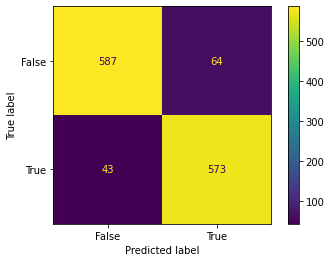

In [45]:
# Then, print a confusion matrix to show false positives, false negatives, etc. (this is in an import!)
confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()